In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
import math

# Data Analysis

In [2]:
df_B=pd.read_csv(r'USED DATA\Volvo 11 B Vsh.csv')

<IPython.core.display.Javascript object>

In [3]:
df_B.describe()

,DEPTH,CALI,DRHO,NPHI,PEF,RT,KLOGH,PHIF,VSH
count,13911.00000,13911.000000,13911.000000,13911.000000,13911.000000,13911.000000,13911.000000,13911.000000,13911.000000
mean,4048.43871,8.661730,0.056124,0.191735,5.367626,2506.850652,346.473834,0.159142,0.247266
std,402.43141,0.071179,0.016340,0.055184,1.340783,12047.425389,518.542832,0.078339,0.174159
min,3351.60000,8.318000,-0.040000,0.024000,3.647000,0.140000,0.001000,0.020000,0.026000
25%,3699.35000,8.625000,0.046000,0.161000,4.395000,2.973000,0.637500,0.085000,0.105000
50%,4049.20000,8.656000,0.054000,0.184000,4.919000,11.597000,39.965000,0.185000,0.202000
75%,4396.95000,8.672000,0.065000,0.213000,5.979000,59.328500,554.622000,0.228000,0.328000
max,4744.70000,9.175000,0.201000,0.541000,11.229000,62290.770000,3224.226000,0.292000,1.000000


In [4]:
import pandas as pd
from scipy.stats import skew, kurtosis


summary_B = df_B.describe()

summary_B ['skewness'] = df_B.skew()
summary_B ['kurtosis'] = df_B.kurtosis()


In [5]:
summary_B.to_csv('summary_B.csv', index=True)  

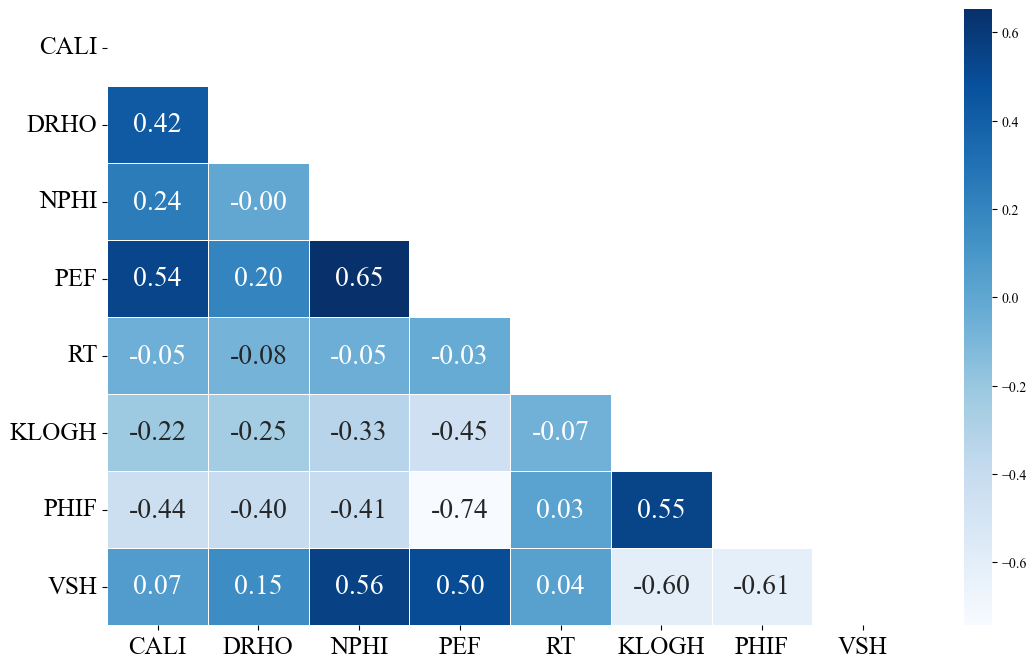

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_B is already defined with the relevant data
# List of columns to include in the correlation matrix
columns = ['CALI', 'DRHO', 'NPHI', 'PEF', 'RT', 'KLOGH', 'PHIF', 'VSH']

# Calculate the correlation matrix
corr = df_B[columns].corr()

# Generate a mask for the upper triangle (to display only the lower triangle)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the font to Times New Roman for all text
plt.rcParams['font.family'] = 'Times New Roman'

# Create the heatmap
plt.figure(figsize=(13, 8))  # Adjust the size as needed
ax = sns.heatmap(corr, mask=mask, annot=True, cmap='Blues', fmt=".2f", 
                 linewidths=0.7, cbar_kws={"shrink": 1, "aspect": 22}, annot_kws={"fontsize": 20})

# Improve x and y ticks
ax.set_xticklabels(ax.get_xticklabels(), fontsize=18, rotation=0,)  # Rotate for better readability
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18, rotation=0)  # Keep y-axis labels horizontal

# Save the figure if needed
plt.savefig('correlation_matrix_lower_triangle_B.png', dpi=600)

# Show the plot
plt.show()



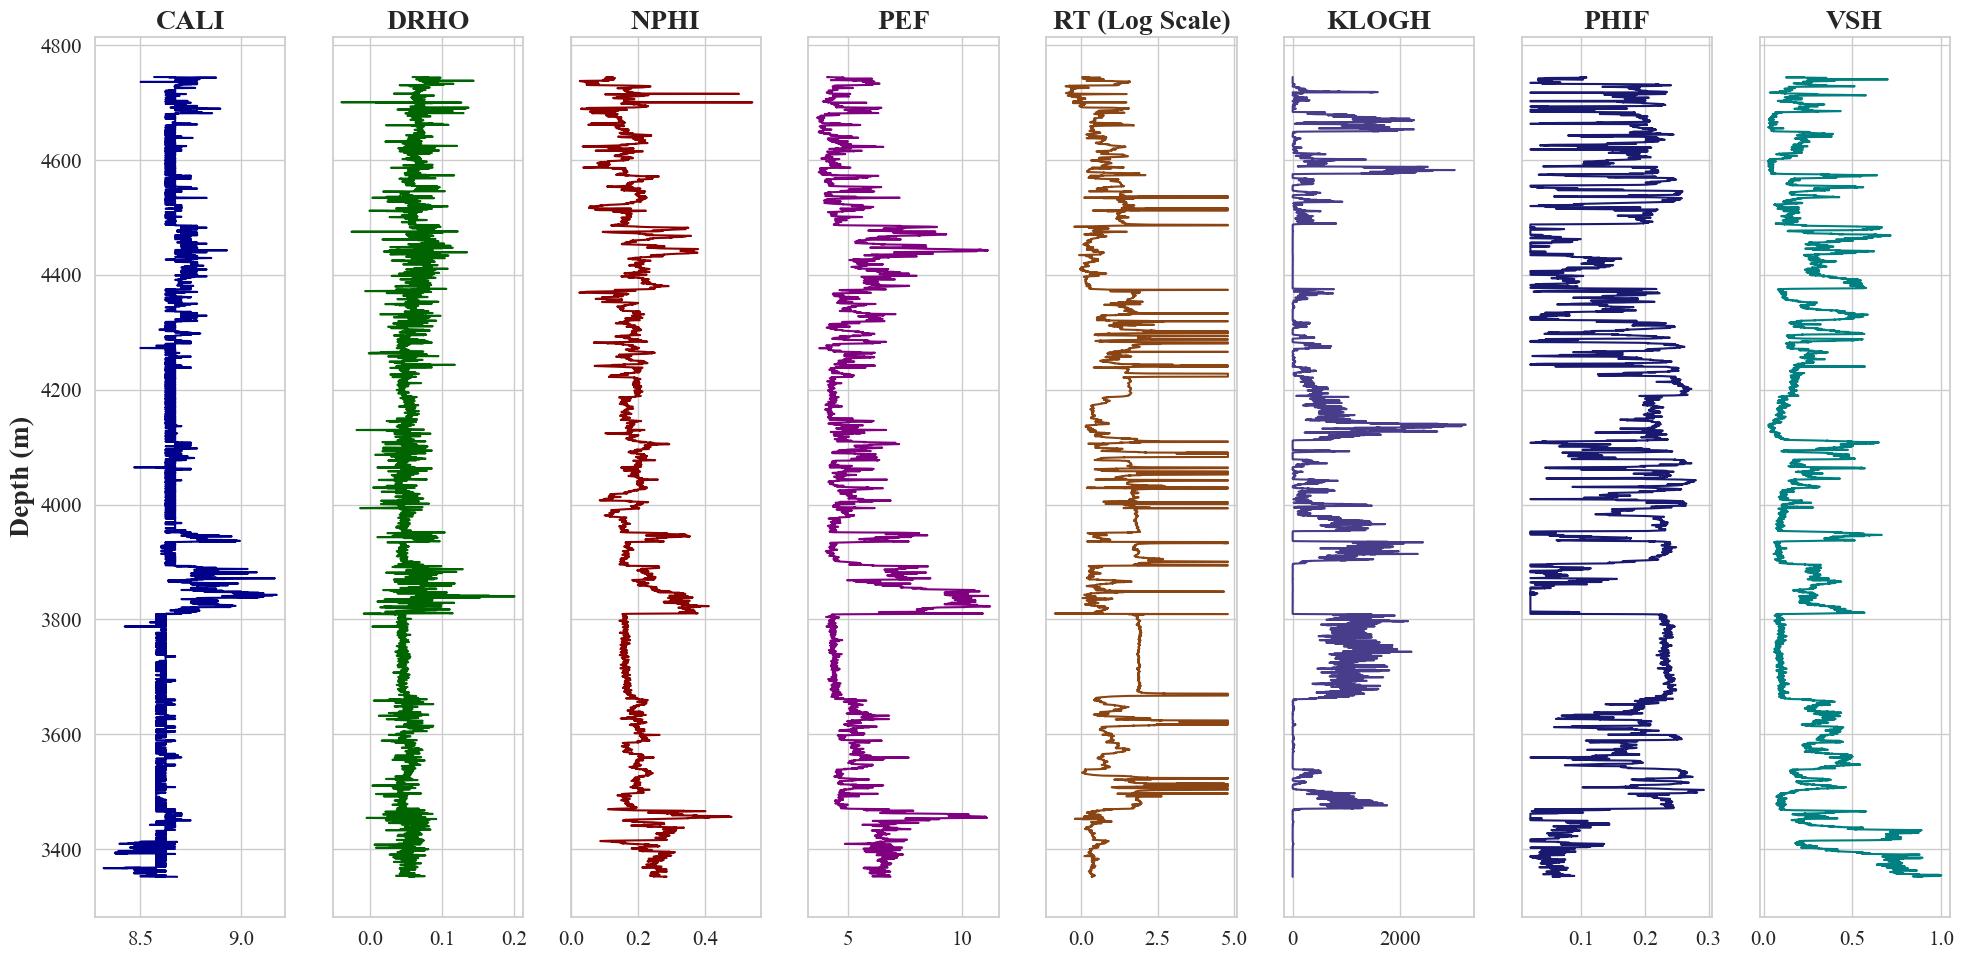

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data creation (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')  # Uncomment and replace with actual data source
# df = df.sort_values(by='Depth')  # Ensure data is sorted by depth

# List of columns to plot (updated with previous column set)
columns = ['CALI', 'DRHO', 'NPHI', 'PEF', 'RT', 'KLOGH', 'PHIF', 'VSH']

# List of colors to use for each plot
colors = ['darkblue', 'darkgreen', 'darkred', 'purple', 'saddlebrown', 'darkslateblue', 'midnightblue', 'teal']

# Set the style for a professional look
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# Define the subplot layout (1 row and as many columns as well logs)
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 10), sharey=True)

# Plot each log
for i, col in enumerate(columns):
    if col == 'RT':  # Apply log scale to RT (resistivity)
        axes[i].plot(np.log10(df_B[col]), df_B['DEPTH'], color=colors[i])
        axes[i].set_title(f'{col} (Log Scale)', fontsize=20, fontweight='bold')
    else:  # Normal scale for other columns
        axes[i].plot(df_B[col], df_B['DEPTH'], color=colors[i])
        axes[i].set_title(col, fontsize=20, fontweight='bold')

    axes[i].invert_yaxis()  # Invert y-axis to have depth increasing downwards
    
    # Set tick size for both axes
    axes[i].tick_params(axis='both', which='major', labelsize=15)  # Increase tick label size
    axes[i].tick_params(axis='both', which='minor', labelsize=15)  # For minor ticks if needed
    
    if i == 0:
        axes[i].set_ylabel('Depth (m)', fontsize=20, fontweight='bold')  # Set depth label only for the first subplot
    else:
        axes[i].set_ylabel('')

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure if needed
plt.savefig('well_log_plot_with_log_rt_different_colors.png', dpi=1000)

# Show plot
plt.show()


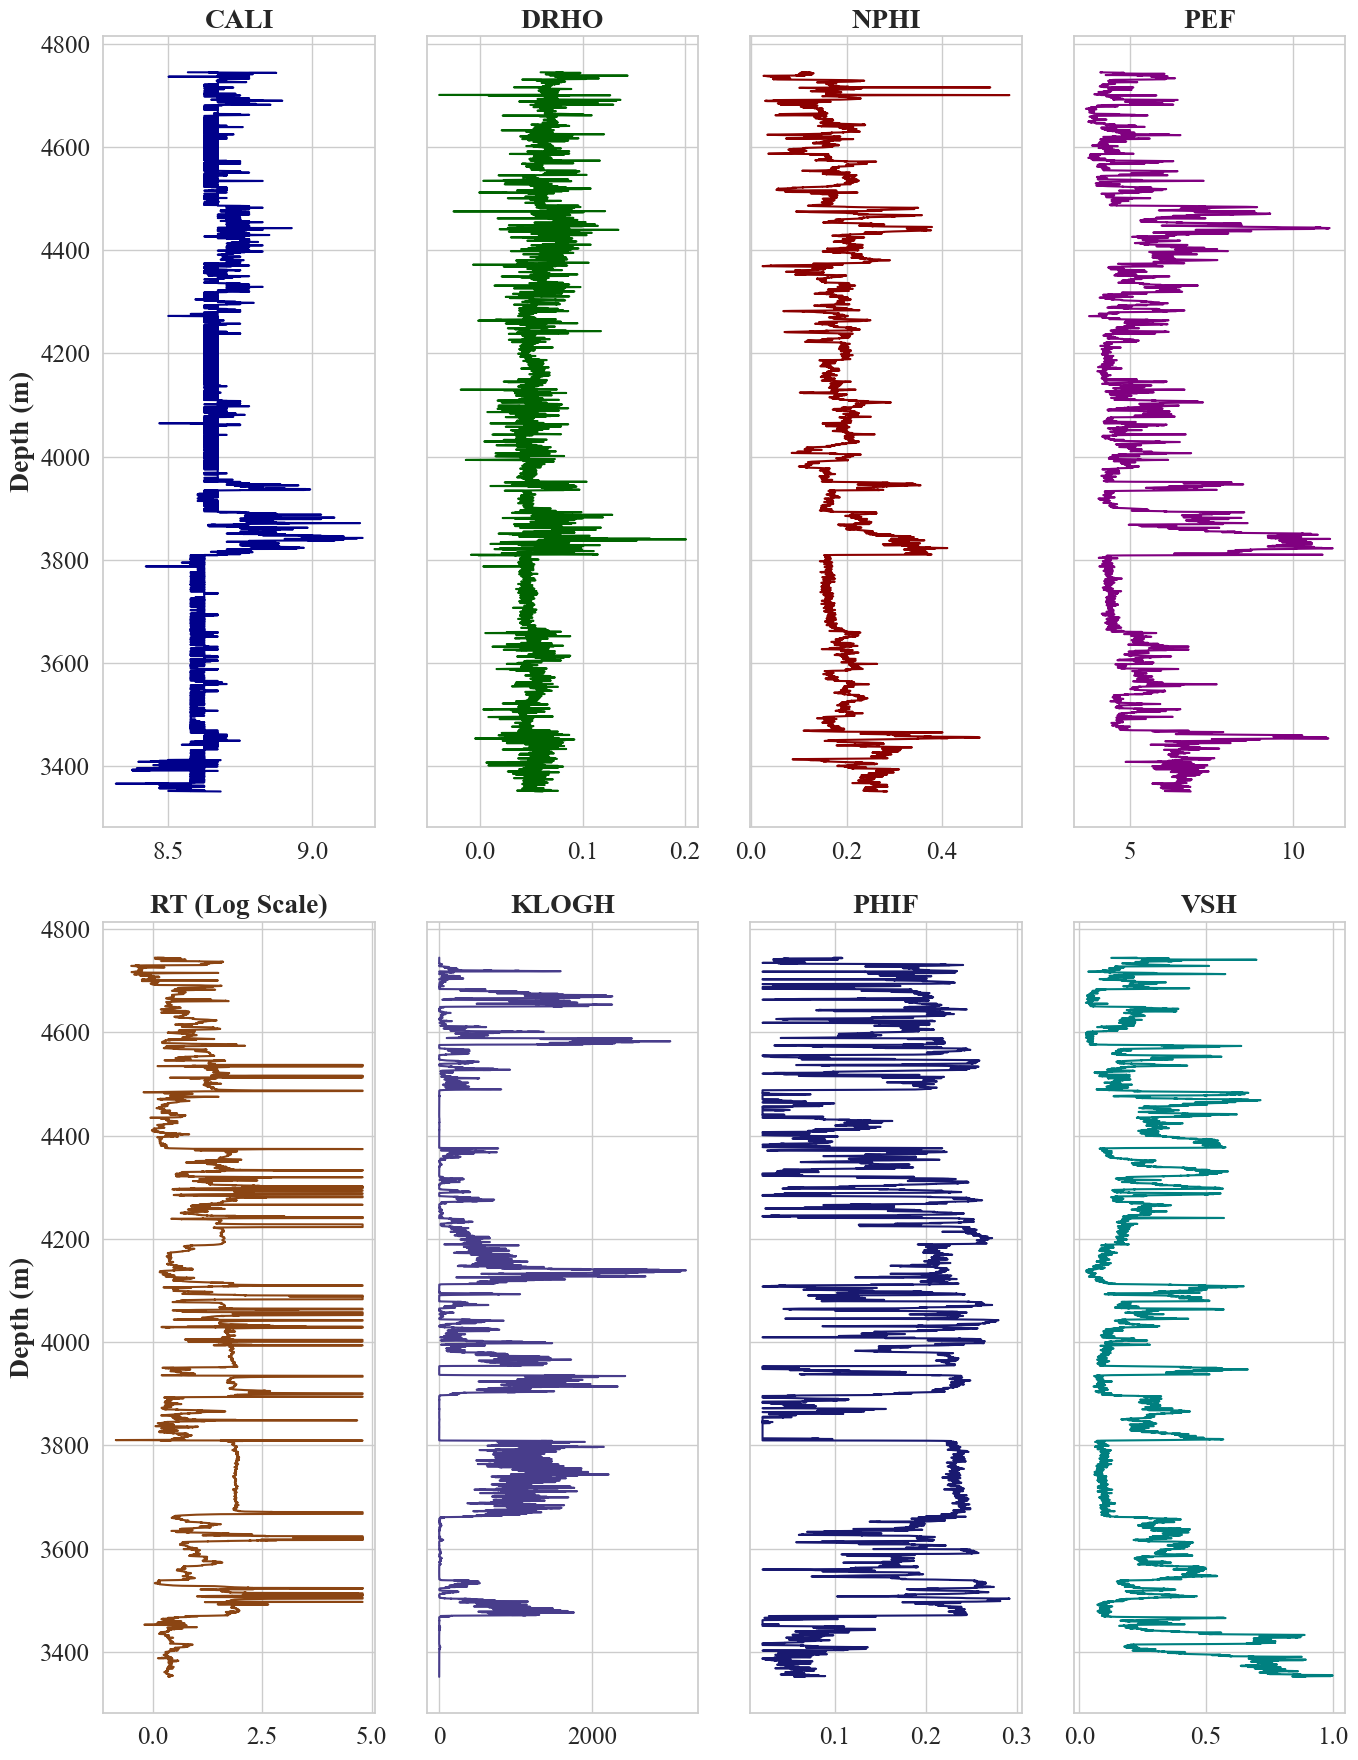

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data creation (replace with your actual data loading)
# df = pd.read_csv('your_data.csv')  # Uncomment and replace with actual data source
# df = df.sort_values(by='Depth')  # Ensure data is sorted by depth

# List of columns to plot (updated with previous column set)
columns = ['CALI', 'DRHO', 'NPHI', 'PEF', 'RT', 'KLOGH', 'PHIF', 'VSH']

# List of colors to use for each plot
colors = ['darkblue', 'darkgreen', 'darkred', 'purple', 'saddlebrown', 'darkslateblue', 'midnightblue', 'teal']

# Set the style for a professional look
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# Define the subplot layout (2 rows and 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 18), sharey=True)

# Flatten axes to make iteration easier
axes = axes.flatten()

# Plot each log
for i, col in enumerate(columns):
    if col == 'RT':  # Apply log scale to RT (resistivity)
        axes[i].plot(np.log10(df_B[col]), df_B['DEPTH'], color=colors[i])
        axes[i].set_title(f'{col} (Log Scale)', fontsize=20, fontweight='bold')
    else:  # Normal scale for other columns
        axes[i].plot(df_B[col], df_B['DEPTH'], color=colors[i])
        axes[i].set_title(col, fontsize=20, fontweight='bold')

    axes[i].invert_yaxis()  # Invert y-axis to have depth increasing downwards
    
    # Set tick size for both axes
    axes[i].tick_params(axis='both', which='major', labelsize=18)  # Increase tick label size
    axes[i].tick_params(axis='both', which='minor', labelsize=18)  # For minor ticks if needed
    
    if i % 4 == 0:  # Set depth label only for the first column in each row
        axes[i].set_ylabel('Depth (m)', fontsize=20, fontweight='bold')
    else:
        axes[i].set_ylabel('')

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure if needed
plt.savefig('well_log_plot_with_log_rt_different_colors_two_rows.png', dpi=1000)

# Show plot
plt.show()


In [22]:
df_B.corr().to_csv('corr.csv')